In [2]:
!pip install tensorflow opencv-python matplotlib


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
!pip list

Package                       Version
----------------------------- ---------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.5
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
anaconda-anon-usage           0.4.2
anaconda-catalogs             0.2.0
anaconda-client               1.12.1
anaconda-cloud-auth           0.1.3
anaconda-navigator            2.5.0
anaconda-project              0.11.1
anyio                         3.5.0
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
atomicwrites                  1.4.0
attrs     


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [6]:
tf.config.list_physical_devices('GPU')

[]

In [7]:
import cv2
import imghdr

C:\Users\liviu\AppData\Local\Temp\ipykernel_45332\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [8]:
data_dir = 'data' 

In [9]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [10]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list data\Aluminium_Cans\MPE20-20Can20Logistics20benefits.jpg
Image not in ext list data\Coffee_Cups\800px-Coffee-cup-sleeve.jpg
Image not in ext list data\Coffee_Cups\Aqueous-MainPic-1.jpg
Image not in ext list data\Coffee_Cups\CoffeeCup16_group__57149.1699464821.jpg
Image not in ext list data\Newspapers\classic-newspaper-template-indd-00.jpg
Image not in ext list data\Newspapers\News-item-blank_618x355.gif


In [11]:
import numpy as np
from matplotlib import pyplot as plt

In [12]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 391 files belonging to 4 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

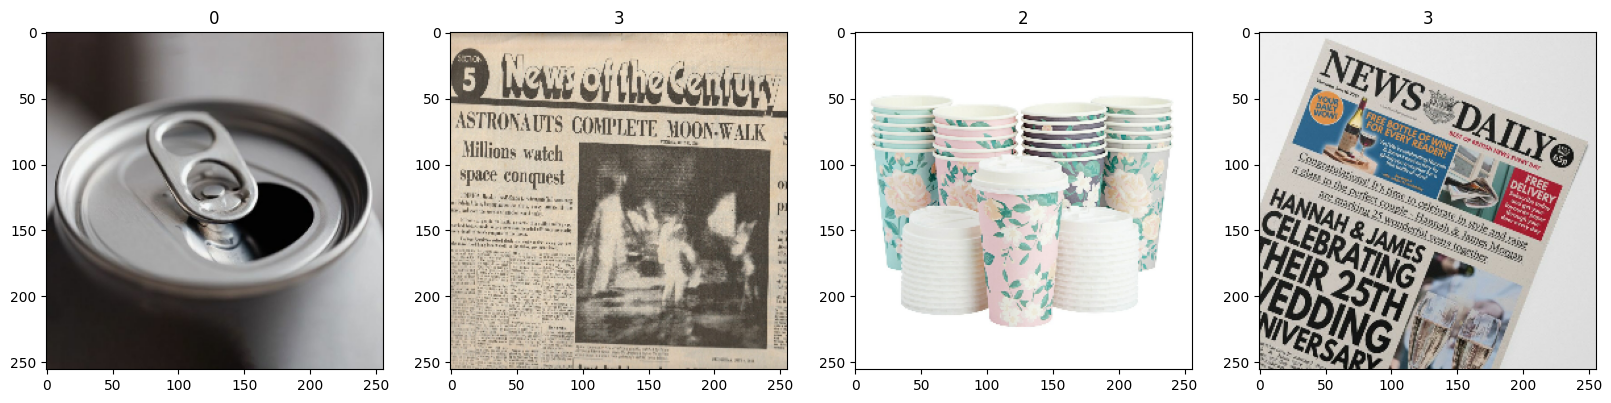

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [16]:
data = data.map(lambda x,y: (x/255, y))

In [17]:
data.as_numpy_iterator().next()

(array([[[[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          ...,
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843],
          [0.99607843, 0.99607843, 0.99607843]],
 
         ...,
 
         [[0.99607843, 0.99607843, 0.99607843],
          [0.99607

In [18]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [19]:
train_size

9

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

In [25]:
model.compile('adam', loss=tf.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
9/9 [==============================] - 10s 903ms/step - loss: 1.6230 - accuracy: 0.2708 - val_loss: 1.3542 - val_accuracy: 0.3906
Epoch 2/20
9/9 [==============================] - 9s 864ms/step - loss: 1.3315 - accuracy: 0.3819 - val_loss: 1.2871 - val_accuracy: 0.3750
Epoch 3/20
9/9 [==============================] - 9s 876ms/step - loss: 1.1693 - accuracy: 0.4549 - val_loss: 0.9725 - val_accuracy: 0.5938
Epoch 4/20
9/9 [==============================] - 9s 881ms/step - loss: 0.9111 - accuracy: 0.6111 - val_loss: 0.6406 - val_accuracy: 0.7969
Epoch 5/20
9/9 [==============================] - 9s 903ms/step - loss: 0.8111 - accuracy: 0.6979 - val_loss: 0.8087 - val_accuracy: 0.6875
Epoch 6/20
9/9 [==============================] - 9s 889ms/step - loss: 0.6174 - accuracy: 0.8160 - val_loss: 0.4719 - val_accuracy: 0.8281
Epoch 7/20
9/9 [==============================] - 10s 928ms/step - loss: 0.4956 - accuracy: 0.8056 - val_loss: 0.2364 - val_accuracy: 0.9688
Epoch 8/20
9/9 [==

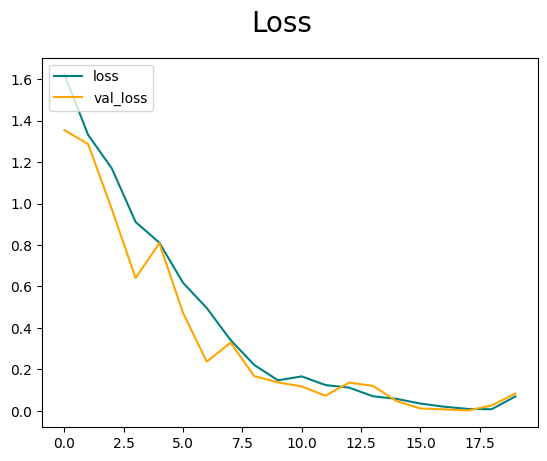

In [30]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

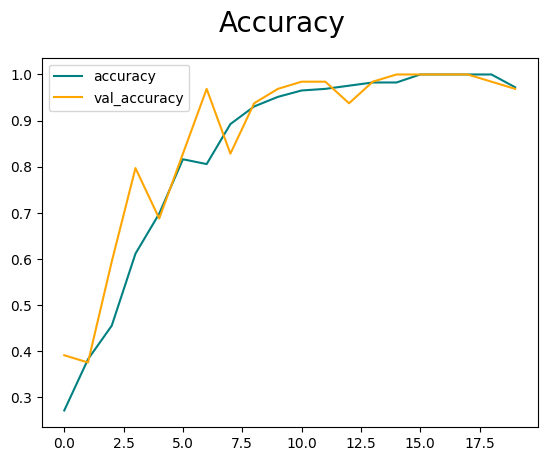

In [31]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [32]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [33]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [34]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 234ms/step


ValueError: Shapes (32, 4) and (32,) are incompatible

In [35]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


In [15]:
import cv2

In [17]:
import matplotlib.pyplot as plt

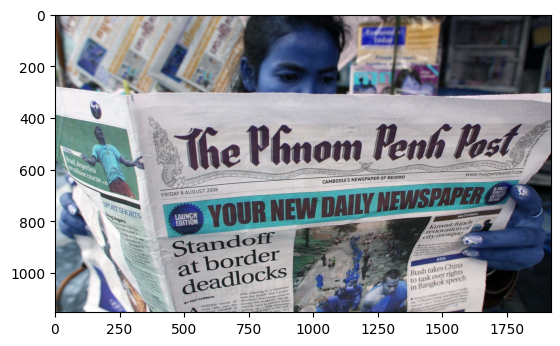

In [18]:
def show_image(file_path):
    img = cv2.imread(file_path)
    if img is not None:
        plt.imshow(img)
        plt.show()
    else:
        print(f"Error: Unable to read image from file '{file_path}'.")

# Example usage with a variable containing the file path
file_path_variable = 'news2.jpg'
show_image(file_path_variable)

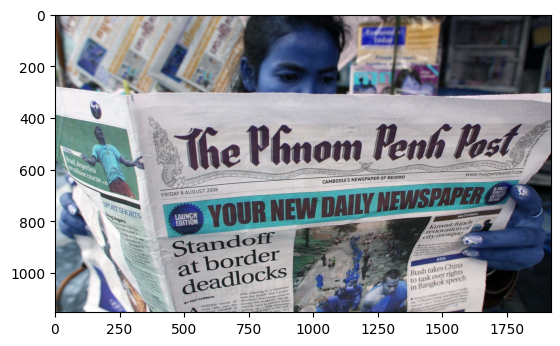

In [57]:
#img = cv2.imread('news2.jpg')
#plt.imshow(img)
#plt.show()

In [19]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

NameError: name 'tf' is not defined

In [59]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 34ms/step


In [60]:
predicted_class = np.argmax(yhat)
print(f'Predicted class: {predicted_class}')

Predicted class: 3


In [40]:
# *** end here ***

In [41]:
yhat

array([[2.3671042e-04, 9.9932575e-01, 3.3974802e-04, 9.7789263e-05]],
      dtype=float32)

In [1]:
!python --version
!pip install mysql-connector-python
!python --version

Python 3.11.5



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Python 3.11.5


In [ ]:
!pip uninstall mysql-connector-python
!pip install mysql-connector-python

In [3]:
import configparser
import mysql.connector

In [4]:
import sys
print(sys.executable)

C:\Users\liviu\ImageClassification\imageclassification\Scripts\python.exe


In [5]:
import site; 
print(site.getsitepackages())

['C:\\Users\\liviu\\ImageClassification\\imageclassification', 'C:\\Users\\liviu\\ImageClassification\\imageclassification\\Lib\\site-packages']


In [69]:
!pip install mysql-connector-python


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import mysql.connector
from mysql.connector import Error
import numpy as np

def create_connection():
    try:
        connection = mysql.connector.connect(
                host = 'localhost',
                user = 'root',
                password = 'Greftumgri1.23',
                database = 'andradb'
        )
        if connection.is_connected():
            print("Connected to MySQL database")
            return connection
    except Error as e:
        print(f"Error: {e}")
        return None

def insert_class(cursor, class_name):
    try:
        cursor.execute(f"INSERT INTO CLASS (NAME) VALUES ('{class_name}')")
    except Error as e:
        print(f"Error inserting class: {e}")

def insert_image(cursor, file_name, file_path):
    try:
        cursor.execute(f"INSERT INTO IMAGE (FILE_NAME, FILE_PATH) VALUES ('{file_name}', '{file_path}')")
        return cursor.lastrowid
    except Error as e:
        print(f"Error inserting image: {e}")
        return None

def insert_classification(cursor, image_id, class_id):
    try:
        cursor.execute(f"INSERT INTO CLASSIFICATION (IMAGE_ID, CLASS_ID) VALUES ({image_id}, {class_id})")
    except Error as e:
        print(f"Error inserting classification: {e}")

# Example usage
connection = create_connection()

if connection:
    try:
        cursor = connection.cursor()

        # Assuming 'yhat' contains the predicted probabilities
        # yhat = [[2.3671042e-04, 9.9932575e-01, 3.3974802e-04, 9.7789263e-05]]
        
        class_names = {
            1: 'Class1',
            2: 'Class2',
            3: 'NEWSPAPER',
            # Add more class indices and names as needed
        }

        # Example usage
        print(f'Predicted class index: {predicted_class}')

        predicted_class_name = class_names.get(predicted_class, f'UnknownClass_{predicted_class}')
        
        print(f'Predicted class name: {predicted_class_name}')

        # Assuming the predicted class is in the 'class_names' dictionary
        predicted_class_name = class_names.get(predicted_class, f'UnknownClass_{predicted_class}')
    
        # Insert a new class
        insert_class(cursor, predicted_class_name)
        
        # Get the absolute path of the image file
        image_path = os.path.abspath(image_filename)

        # Read the image using OpenCV
        img = cv2.imread(image_path)

        # Now 'image_path' contains the full path to the image file
        print(f"Full path of the image: {image_path}")

        # Insert a new image (replace with actual image details)
        image_id = insert_image(cursor, 'example.jpg', '/path/to/example.jpg')

        # Insert a new classification linking the image and predicted class
        insert_classification(cursor, image_id, predicted_class)

        # Commit changes
        connection.commit()

    finally:
        cursor.close()
        connection.close()
        print("Connection closed")

Connected to MySQL database
Predicted class index: 3
Predicted class name: NEWSPAPER
Connection closed


In [ ]:
!pip install psycopg2-binary

In [ ]:
import psycopg2
from psycopg2 import OperationalError

In [ ]:
!pip list | grep psycopg2-binary